In [17]:
# library for array calculation
import numpy
# library for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
%matplotlib inline

In [18]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
        
        # link weight matrices wih, who
        # weights inside the arrays are w_i_h, where link is from node i to node h in the next layer
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # using sigmoid for activation function
        self.activation_function = lambda x : scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error
        output_errors = targets - final_outputs
        # hidden layer error is needed recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array(1 row -> 1 column)
        inputs = numpy.array(inputs_list, ndmin=2).T
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
                

In [19]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 250
output_nodes = 10
                
# learning rate
learing_rate = 0.05
            
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learing_rate)

In [20]:
# load the mnist training data
training_data_file = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [21]:
# train the neural network
epoches = 5
                
for e in range(epoches):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(",")
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.999) + 0.001
        # create the target output values
        targets = numpy.zeros(output_nodes) +0.01
        # all_values[0] is the target label for this record  
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [22]:
import glob
import imageio
import numpy
# our own number image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob("own_number_images/image_?.png"):
    # use the filename to set the correct label
    label = int(image_file_name[-5])
    
    # load image data from png files into an img_array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(28,28)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.999) + 0.001
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # append label and image data to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    pass

loading ...  own_number_images\image_1.png
0.28387672
0.77621734
loading ...  own_number_images\image_2.png
0.3011765
0.7287012
loading ...  own_number_images\image_3.png
0.30284587
0.80062956
loading ...  own_number_images\image_6.png
0.33523247
0.8390532
loading ...  own_number_images\image_8.png
0.30001566
0.7666162
loading ...  own_number_images\image_9.png
0.31970304
0.73123246


[[0.07542412]
 [0.00213507]
 [0.01792516]
 [0.43999717]
 [0.00177756]
 [0.02874726]
 [0.19589813]
 [0.01281917]
 [0.57195777]
 [0.04634128]]
network says 8
no match!


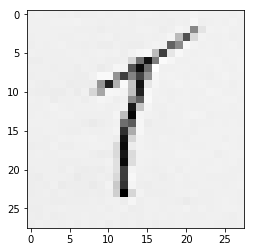

In [30]:
import matplotlib.pyplot
# test the neural network with our own images

# record in test_set
item = 0

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass